In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc

# 1.Problem Statement

In [ ]:
predict when couple has to take divoced??

# 2. Data Gathering

In [ ]:
## Divorce Reserach
?? Questions are ranked on a scale of 1-5 with 1 being the lowest and 5 being the highest. The last category states if the 
couple has divorced.??

*    If one of us apologizes when our discussion deteriorates, the discussion ends.
*    I know we can ignore our differences, even if things get hard sometimes.
*    When we need it, we can take our discussions with my spouse from the beginning and correct it.
*    When I discuss with my spouse, to contact him will eventually work.
*    The time I spent with my wife is special for us.
*    we don't have time at home as partners.
*    We are like two strangers who share the same environment at home rather than family.
*    I enjoy our holidays with my wife.
*    I enjoy traveling with my wife.
*    Most of our goals are common to my spouse.
*    I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
*    My spouse and I have similar values in terms of personal freedom.
*    My spouse and I have similar sense of entertainment.
*    Most of our goals for people (children, friends, etc.) are the same.
*    Our dreams with my spouse are similar and harmonious.
*    We're compatible with my spouse about what love should be.
*    We share the same views about being happy in our life with my spouse
*    My spouse and I have similar ideas about how marriage should be
*    My spouse and I have similar ideas about how roles should be in marriage
*    My spouse and I have similar values in trust.
*    I know exactly what my wife likes.
*    I know how my spouse wants to be taken care of when she/he sick.
*    I know my spouse's favorite food.
*    I can tell you what kind of stress my spouse is facing in her/his life.
*    I have knowledge of my spouse's inner world.
*    I know my spouse's basic anxieties.
*    I know what my spouse's current sources of stress are.
*    I know my spouse's hopes and wishes.
*    I know my spouse very well.
*    I know my spouse's friends and their social relationships.
*    I feel aggressive when I argue with my spouse.
*    When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
*    I can use negative statements about my spouse's personality during our discussions.
*    I can use offensive expressions during our discussions.
*    I can insult my spouse during our discussions.
*    I can be humiliating when we discussions.
*    My discussion with my spouse is not calm.
*    I hate my spouse's way of open a subject.
*    Our discussions often occur suddenly.
*    We're just starting a discussion before I know what's going on.
*    When I talk to my spouse about something, my calm suddenly breaks.
*    When I argue with my spouse, ı only go out and I don't say a word.
*    I mostly stay silent to calm the environment a little bit.
*    Sometimes I think it's good for me to leave home for a while.
*    I'd rather stay silent than discuss with my spouse.
*    Even if I'm right in the discussion, I stay silent to hurt my spouse.
*    When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
*    I feel right in our discussions.
*    I have nothing to do with what I've been accused of.
*    I'm not actually the one who's guilty about what I'm accused of.
*    I'm not the one who's wrong about problems at home.
*    I wouldn't hesitate to tell my spouse about her/his inadequacy.
*    When I discuss, I remind my spouse of her/his inadequacy.
*    I'm not afraid to tell my spouse about her/his incompetence.
*    Divorce Yes/No

In [2]:
df=pd.read_csv(r"C:\Users\CHETAK\Desktop\daily class notes\archive (5)\divorce.csv")
df

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


# 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [4]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [5]:
df.shape

(170, 55)

In [8]:
df.value_counts().sum()

170

In [9]:
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [10]:
# there is no null values and all data is in numeric so we can directly train our model

In [ ]:
4. Feature engg
5. Feature selection

# 6. Model Trannig

In [11]:
y=df['Divorce_Y_N']
x=df.drop('Divorce_Y_N',axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=42)


In [14]:
rfm = RandomForestClassifier()


In [15]:
rfm.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
y_pred=rfm.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [17]:
y_test

139    0
30     1
119    0
29     1
144    0
163    0
166    0
51     1
105    0
60     1
15     1
158    0
135    0
45     1
68     1
85     0
24     1
109    0
75     1
108    0
19     1
16     1
31     1
18     1
12     1
9      1
82     1
98     0
76     1
55     1
42     1
56     1
150    0
111    0
69     1
138    0
2      1
93     0
136    0
156    0
90     0
114    0
26     1
146    0
137    0
97     0
65     1
36     1
126    0
22     1
101    0
Name: Divorce_Y_N, dtype: int64

In [21]:
rfm.score(x_train,y_train) 



1.0

In [22]:
rfm.score(x_test,y_test)

0.9803921568627451

# 7. Model Evalution

#### Test Data

In [23]:


y_pred = rfm.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("ACC =",acc)
print()

cnf = confusion_matrix(y_test,y_pred)
print(cnf)

clf = classification_report(y_test,y_pred)
print()
print(clf)

ACC = 0.9803921568627451

[[25  0]
 [ 1 25]]

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



#### Train Data

In [24]:


y_pred_train = rfm.predict(x_train)

acc = accuracy_score(y_train,y_pred_train)
print("ACC =",acc)
print()

cnf = confusion_matrix(y_train,y_pred_train)
print(cnf)

clf = classification_report(y_train,y_pred_train)
print()
print(clf)

ACC = 1.0

[[61  0]
 [ 0 58]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        58

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



In [25]:
# tranning data gives 100% acc ,i.e. overfit so we have reduce little acc by hyperpara tunning

### Hyperparameter Tunning

In [30]:
rf_hyp_model = RandomForestClassifier() 
hyp = {'n_estimators': np.arange(10,150,10),
        'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,12),
    'min_samples_split': np.arange(2,20),
    'min_samples_leaf': np.arange(1,8)
}

rscv = RandomizedSearchCV(rf_hyp_model,hyp, cv= 5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])})

In [29]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       n_estimators=60)

In [31]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       n_estimators=60)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       n_estimators=60)

### Model Evalution After Hyperparameter Tunning

In [32]:
### Test Data 

y_pred = rf_model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("ACC =",acc)
print()

cnf = confusion_matrix(y_test,y_pred)
print(cnf)

clf = classification_report(y_test,y_pred)
print()
print(clf)

ACC = 0.9803921568627451

[[25  0]
 [ 1 25]]

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [33]:
### train Data 

y_pred = rf_model.predict(x_train)

acc = accuracy_score(y_train,y_pred)
print("ACC =",acc)
print()

cnf = confusion_matrix(y_train,y_pred)
print(cnf)

clf = classification_report(y_train,y_pred)
print()
print(clf)

ACC = 0.9747899159663865

[[61  0]
 [ 3 55]]

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        61
           1       1.00      0.95      0.97        58

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.98      0.97      0.97       119



In [ ]:
now we got,
testing acc >> 98%
trainning acc >> 97%
expected acc >> 97%
our model is,
-----GENERLISE MODEL----

#### Feature Importance

In [34]:
rf_model.feature_importances_

array([2.25634466e-03, 3.32792598e-03, 4.68262179e-04, 1.69002916e-02,
       5.02738021e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.50776214e-02, 0.00000000e+00, 3.19170200e-02, 4.74019584e-02,
       6.64739419e-04, 1.89041704e-03, 1.63854147e-02, 8.22396078e-02,
       8.16550652e-02, 1.16266330e-01, 6.81901362e-02, 7.78119720e-02,
       1.29213512e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.53960765e-02, 4.63371003e-02, 1.58564629e-02, 1.60019272e-02,
       2.84225356e-02, 3.08048770e-02, 4.27897238e-04, 0.00000000e+00,
       6.92433176e-04, 1.18017076e-03, 1.07575394e-03, 6.59132356e-02,
       1.69983552e-02, 8.21044015e-02, 3.48359404e-03, 4.95025171e-02,
       1.81093938e-02, 4.83550233e-04, 0.00000000e+00, 1.54037650e-02,
       4.91248731e-04, 0.00000000e+00, 3.92198921e-04, 4.50137741e-04,
       5.44486627e-03, 2.26220752e-03, 5.50290375e-04, 5.58651025e-04,
       1.16618342e-03, 8.83312853e-05])

In [35]:
# we can drop unwatned features but now our model is perfect so we dont have do that

### Fpr, Tpr, Thresh ,roc_curve

In [36]:
y_pred_prob = rf_model.predict_proba(x_test)
y_pred_prob

array([[0.90654346, 0.09345654],
       [0.        , 1.        ],
       [0.94027098, 0.05972902],
       [0.        , 1.        ],
       [0.79253307, 0.20746693],
       [0.79338624, 0.20661376],
       [0.90813076, 0.09186924],
       [0.        , 1.        ],
       [0.9666804 , 0.0333196 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.90804335, 0.09195665],
       [0.9869006 , 0.0130994 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.99814815, 0.00185185],
       [0.        , 1.        ],
       [0.99047203, 0.00952797],
       [0.20136091, 0.79863909],
       [0.89848129, 0.10151871],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.72658924, 0.27341076],
       [0.03333333, 0.96666667],
       [0.99178613, 0.00821387],
       [0.01875   , 0.98125   ],
       [0.        , 1.        ],
       [0.

In [37]:
y_pred_prob = rf_model.predict_proba(x_test)
y_pred_prob[:,1]

array([0.09345654, 1.        , 0.05972902, 1.        , 0.20746693,
       0.20661376, 0.09186924, 1.        , 0.0333196 , 1.        ,
       1.        , 0.09195665, 0.0130994 , 1.        , 1.        ,
       0.00185185, 1.        , 0.00952797, 0.79863909, 0.10151871,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.27341076, 0.96666667, 0.00821387, 0.98125   , 1.        ,
       1.        , 1.        , 0.01303225, 0.04764883, 0.76411487,
       0.00945166, 0.88747415, 0.08812229, 0.02454365, 0.07639305,
       0.00859788, 0.01520979, 1.        , 0.07393519, 0.00945166,
       0.00185185, 1.        , 1.        , 0.06630851, 1.        ,
       0.00607263])

In [40]:
fpr, tpr, thresh=roc_curve(y_test,y_pred_prob[:,1])

In [41]:
fpr

array([0.  , 0.  , 0.  , 0.72, 0.8 , 0.92, 1.  ])

In [42]:
tpr

array([0.        , 0.76923077, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [43]:
thresh

array([2.00000000e+00, 1.00000000e+00, 2.73410756e-01, 9.52797203e-03,
       9.45165945e-03, 6.07263107e-03, 1.85185185e-03])

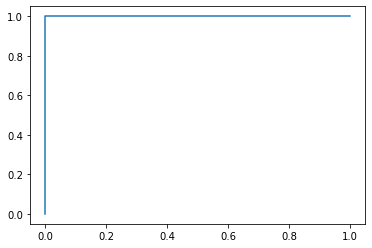

In [44]:
plt.plot(fpr,tpr)

Text(0.5, 1.0, 'ROC Curve')

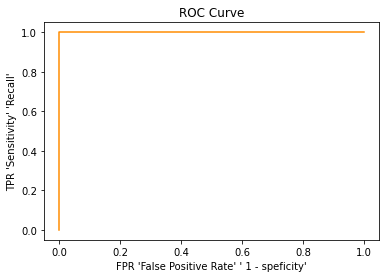

In [46]:
plt.plot(fpr,tpr,color='darkorange')
plt.xlabel("FPR 'False Positive Rate' ' 1 - speficity'")
plt.ylabel("TPR 'Sensitivity' 'Recall'")
plt.title("ROC Curve")